# Tool failure modes prediction #

Welcome to this assignment. In this asignment you will try to predict 4 indepent failure modes:
- tool wear failure (TWF)
- heat dissipation failure (HDF)
- power failure (PWF)
- overstrain failure (OSF)<br>

In addition you will try to predict the total failure mode (machine failure).

Please note, due to the confidentiality of these data sets this data set is artificially generated. I will reveal the source after succesful completion of the assignment.

Below I will help you a little bit, but I expect a lot more from you!<br>
The assignments are indicated below with 1), 2) etc.


In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/bbozon/DataScience/refs/heads/main/ai4i2020.csv'
'''
The dataset consists of 10 000 data points stored as rows with 14 features in columns
UID: unique identifier ranging from 1 to 10000
product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
air temperature [K]
process temperature [K]
rotational speed [rpm]
torque [Nm]
tool wear [min]

The machine failure consists of five independent failure modes
tool wear failure (TWF)
heat dissipation failure (HDF)
power failure (PWF)
overstrain failure (OSF)
random failures (RNF)

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1.
'''
df = pd.read_csv(url)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# First step #


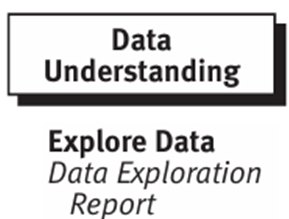


I will help you a little bit. I will combine the columns TWF, HDF, PWF, OSF and RNF in a new column "Combined_failure_modes".

In [ ]:
# generated by chat gpt (but I do understand it ;-))
failures = ['TWF','HDF','PWF','OSF','RNF']
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

def combine_columns(row):
    for col in failures:
        if row[col] == 1:
            return col
    return 'No failure'

# Create a new column with the combined values
df['Combined_failure_modes'] = df.apply(combine_columns, axis=1)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Combined_failure_modes
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,No failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,No failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,No failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,No failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,No failure


Again I will help you a little bit. We could try a pairplot, let's make the label "Machine failure".

In [ ]:
# import seaborn as sns

# failures = ['TWF','HDF','PWF','OSF','RNF']

# sns.pairplot(df.drop(['UDI','Product ID','Type'] + failures, axis=1), hue='Machine failure')

1) Try the same pairplot for the other failure modes.

2) Try the pairplot for the 'Combined_failure_modes'.

2) Try different type of plots. Which plot would you use for the tool wear (time)?

The 'UID' and 'Product ID' are distinct and add nothing so we dorp them

In [ ]:
df=df.drop(['UDI','Product ID'], axis=1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Combined_failure_modes
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,No failure
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,No failure
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,No failure
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,No failure
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,No failure


In [ ]:
# import matplotlib.pyplot as plt

# for failure in failures:
#     failures_to_drop = [f for f in failures if f != failure]

#     sns.pairplot(df.drop(['UDI','Product ID','Type','Machine failure'] + failures_to_drop, axis=1), hue=failure)
#     plt.show()
#     plt.figure()

# sns.pairplot(df.drop(['UDI','Product ID','Type', 'Machine failure'] + failures, axis=1), hue='Combined_failure_modes')

In [ ]:
# for feature in features:
#     sns.kdeplot(
#         data=df,
#         x=feature,
#         hue='Combined_failure_modes',
#         common_norm=False  # Belangrijk: schaalt elke fout apart zodat je ze goed ziet
#     )
#     plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# for feature in features:
#     plt.figure(figsize=(12, 6))

#     # Boxplot maken
#     sns.boxplot(
#         data=df, # Hier kun je eventueel filteren als 'No Failure' de rest wegdrukt
#         x='Combined_failure_modes',
#         y=feature,
#         palette='Set2' # Geeft elke box een ander kleurtje
#     )

#     plt.title(f'Ditribution of {feature} per Failure Mode')
#     plt.xticks(rotation=45) # Zorgt dat de tekst op de x-as leesbaar blijft
#     plt.grid(True, axis='y', alpha=0.3)
#     plt.show()

<Axes: xlabel='Combined_failure_modes'>

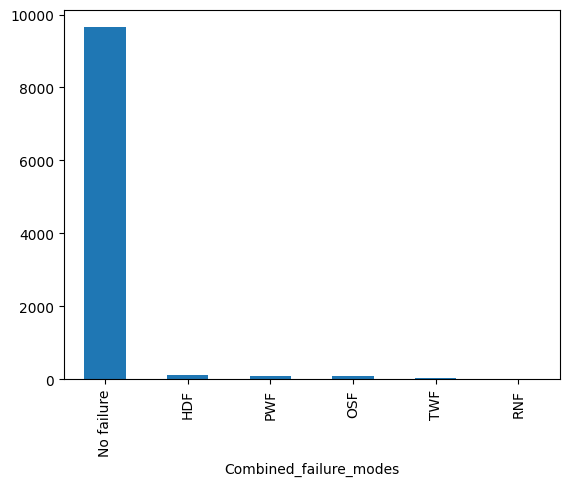

In [ ]:
#ammount of failuers
df['Combined_failure_modes'].value_counts().plot(kind='bar')
# df['UID'].value_counts().plot(kind='bar')

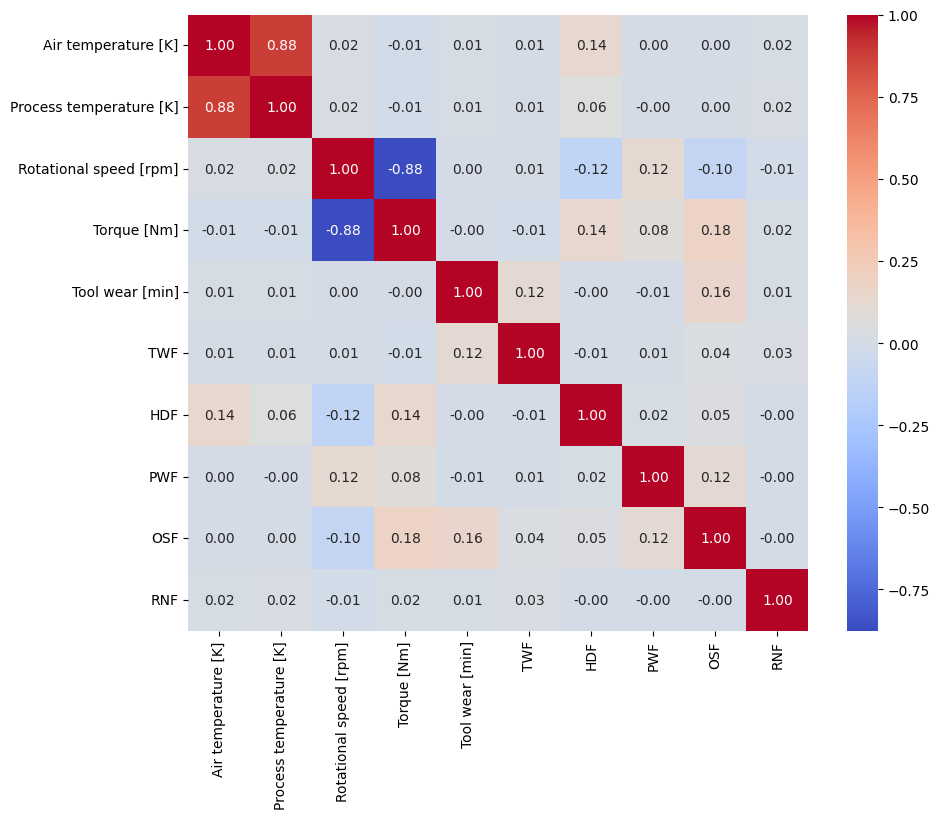

In [ ]:
#correlatin matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.drop(['Type', 'Machine failure','Combined_failure_modes'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

The correlations are weak. I assume this is becouse we treath every tool the same

In [ ]:
import pandas as pd
import numpy as np

def split_dataframe_by_column_value(df, column_name):
    """
    Splits a DataFrame into multiple DataFrames based on the unique values 
    in a specified column.

    :param df: The original Pandas DataFrame.
    :param column_name: The name of the column to use for splitting (e.g., 'Type').
    :return: A dictionary where keys are the unique values and values are the new DataFrames.
    """
    
    # Identify all unique values in the target column
    unique_values = df[column_name].unique()
    
    # Initialize a dictionary to store the resulting DataFrames
    split_dataframes = {}
    
    print(f"Splitting data into {len(unique_values)} DataFrames based on '{column_name}'...")
    
    # Iterate through each unique value and filter the data
    for value in unique_values:
        # Create a new DataFrame containing only rows where the column matches the current value
        # .copy() is used to prevent SettingWithCopyWarning
        subset_df = df[df[column_name] == value].copy()
        
        # Store the new DataFrame in the dictionary with the value as the key
        split_dataframes[value] = subset_df
        
        # Print confirmation (optional)
        print(f"  - Created DataFrame for '{value}' with {len(subset_df)} rows.")
        
    return split_dataframes

data_by_type = split_dataframe_by_column_value(df, 'Type')

Splitting data into 3 DataFrames based on 'Type'...
  - Created DataFrame for 'M' with 2997 rows.
  - Created DataFrame for 'L' with 6000 rows.
  - Created DataFrame for 'H' with 1003 rows.


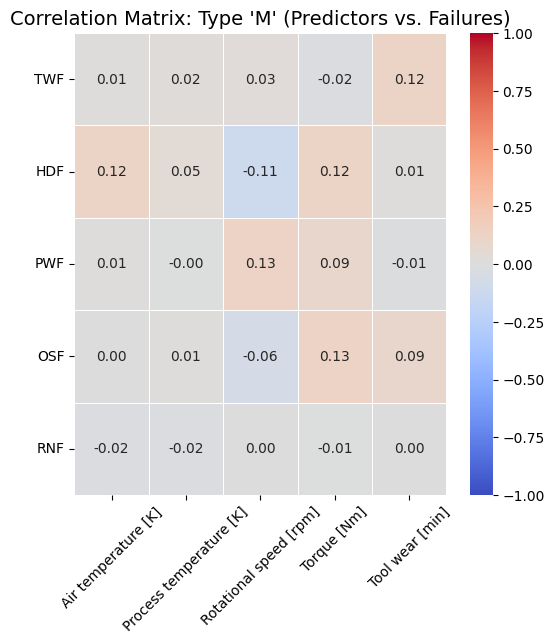

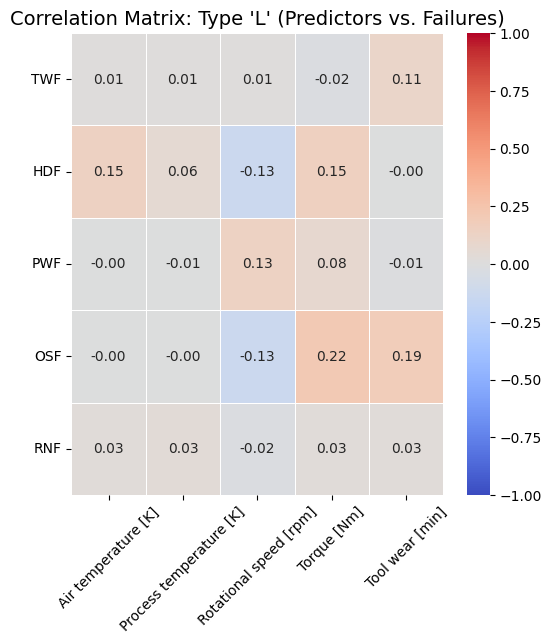

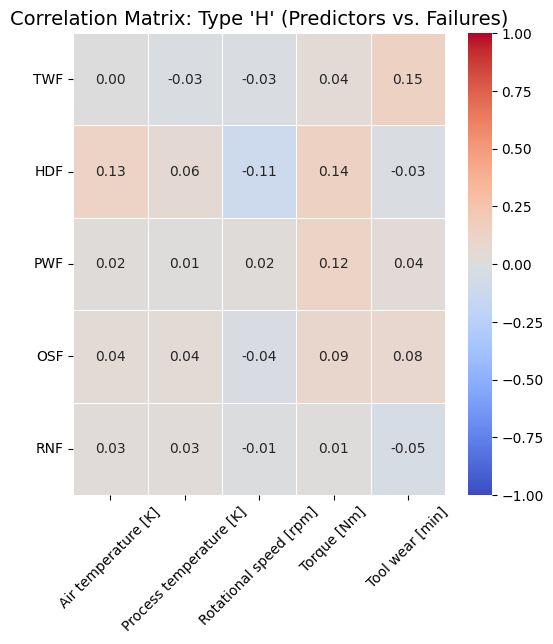

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for i, (type_key, df) in enumerate(data_by_type.items()):
    df_loop= df.drop(['Machine failure'], axis=1)
    # 1. Define X-axis columns (Predictors: all numerical, excluding targets)
    # We droppen failures HIER NIET, omdat we ze in de volgende stap selecteren voor de Y-as
    # Numeric_predictors is de lijst van kolommen die we willen behouden
    numeric_predictors = df_loop.select_dtypes(include=np.number).columns.tolist()
    
    # We sluiten alle failure columns uit van de predictors om duplicatie/verwarring te voorkomen
    # Dit is de X-AS
    X_cols = [col for col in numeric_predictors if col not in failures]

    # 2. Define Y-axis columns (Targets: failures)
    # Dit is de Y-AS
    Y_cols = failures 

    # Check for sufficient data columns for correlation
    if len(X_cols) < 1 or len(Y_cols) < 1:
         print(f"Warning: Insufficient data to plot correlation for Type '{type_key}'.")
         continue
         
    # 3. Calculate the full square matrix on all relevant columns
    all_cols = X_cols + Y_cols
    full_corr_matrix = df_loop[all_cols].corr()
    
    # 4. Slice the desired rectangular part (Y-axis rows, X-axis columns)
    # THIS GUARANTEES A 2D DATAFRAME FOR SEABORN
    corr_matrix = full_corr_matrix.loc[Y_cols, X_cols]

    # 5. Plotting
    plt.figure(figsize=(len(X_cols) * 1.2, len(Y_cols) * 1.2))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        vmin=-1, vmax=1,
        linewidths=0.5
    )
    
    plt.title(f"Correlation Matrix: Type '{type_key}' (Predictors vs. Failures)", fontsize=14)
    plt.tick_params(axis='x', rotation=45)
    plt.tick_params(axis='y', rotation=0)

    plt.show()

    ## add reatures
    df['Power_Wear_Factor'] = df['Torque [Nm]'] * df['Tool wear [min]']

# plot agen for new reture
for i, (type_key, df) in enumerate(data_by_type.items()):
    df_loop= df.drop(['Machine failure'], axis=1)
    # 1. Define X-axis columns (Predictors: all numerical, excluding targets)
    # We droppen failures HIER NIET, omdat we ze in de volgende stap selecteren voor de Y-as
    # Numeric_predictors is de lijst van kolommen die we willen behouden
    # numeric_predictors = df_loop.select_dtypes(include=np.number).columns.tolist()
    numeric_predictors = ['Power_Wear_Factor']
    
    # We sluiten alle failure columns uit van de predictors om duplicatie/verwarring te voorkomen
    # Dit is de X-AS
    X_cols = [col for col in numeric_predictors if col not in failures]

    # 2. Define Y-axis columns (Targets: failures)
    # Dit is de Y-AS
    Y_cols = failures 

    # Check for sufficient data columns for correlation
    if len(X_cols) < 1 or len(Y_cols) < 1:
         print(f"Warning: Insufficient data to plot correlation for Type '{type_key}'.")
         continue
         
    # 3. Calculate the full square matrix on all relevant columns
    all_cols = X_cols + Y_cols
    full_corr_matrix = df_loop[all_cols].corr()
    
    # 4. Slice the desired rectangular part (Y-axis rows, X-axis columns)
    # THIS GUARANTEES A 2D DATAFRAME FOR SEABORN
    corr_matrix = full_corr_matrix.loc[Y_cols, X_cols]

    # 5. Plotting
    plt.figure(figsize=(len(X_cols) * 1.2, len(Y_cols) * 1.2))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        vmin=-1, vmax=1,
        linewidths=0.5
    )
    
    plt.title(f"Correlation Matrix: Type '{type_key}' (Predictors vs. Failures)", fontsize=14)
    plt.tick_params(axis='x', rotation=45)
    plt.tick_params(axis='y', rotation=0)

    plt.show()

# Second step #

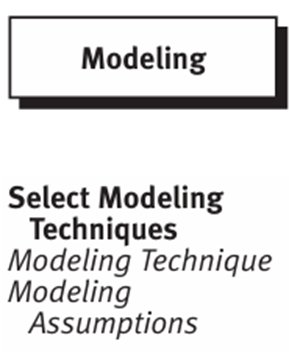

1) What kind of models do you want to try? For which failure mode? <br>
    I want to try random forrest svm and xgboost and knn. random forrst and svm prestated the best in the previous exersice and i want to try svm agen and try xgboost
2) Which assumptions can/did you make about the data? And the model?<br>
    I droped useles data. There is a big imbalance in data
3) Probably you need different models for different failure modes? What do you think?
    Making different models for different failuires is good becouse of the imbalance

# Third step #

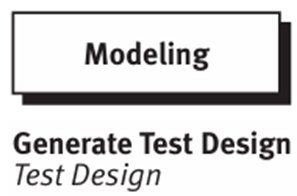

1) Which data are you selecting for which model? <br>
2) Split your dataset in train/validation/test. <br>
3) Any scaling or other preprocessing needed? <br>

In [ ]:
# I'm just giving you 1 example....
X=df.drop(['Type','Machine failure','TWF','HDF','PWF','OSF','RNF','Combined_failure_modes'],axis=1) # I'm dropping the colomns I do NOT want.
y=df['Machine failure']

from sklearn.model_selection import train_test_split
# we always want to work with a training, validation and test data set
X_train, X_valid_plus_test, y_train, y_valid_plus_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validation, y_test,y_validation = train_test_split(X_valid_plus_test, y_valid_plus_test, test_size=0.5, random_state=42)

# Fourth step #

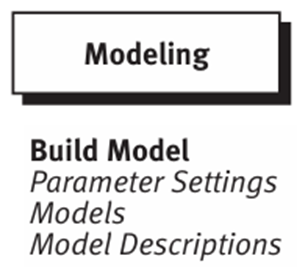

In [ ]:
# I'm just giving you 1 example....
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)                                                     # train the model

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


1) Choose the settings for your hyper parameters <br>
2) Build your model(s)!

# Fifth step #
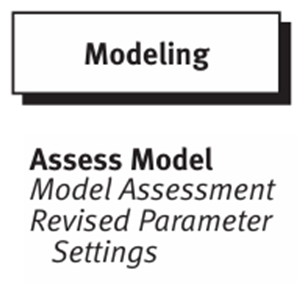

1) As you can see below a simple model already gives an accuracy of 0.981.
This result is however not so good at all! From the machine failures (28 in total) it only estimated 50% correct!!! <br>
2) What is your real goal? Have a look at https://klu.ai/glossary/accuracy-precision-recall-f1 <br>
Are you looking for precision, or recall? or something else????


accuracy is : 0.9801980198019802


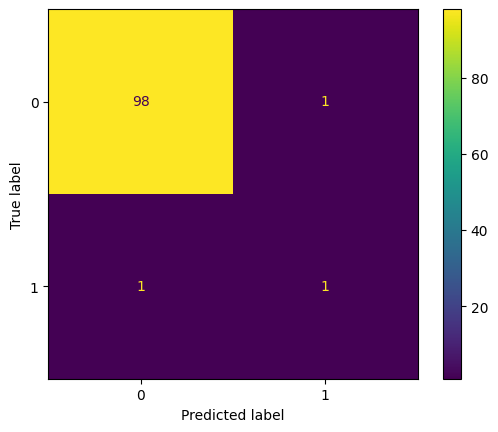

In [ ]:
# I'm just giving you 1 example....
pred = model.predict(X_validation)
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_validation, pred)
print ('accuracy is :',accuracy_score(y_validation, pred))

# And repeat!!!! #
1) Go back to 1st, 2nd or 3rd step and improve your results!



Lets train a butch of models for eacht failure and see what works and what doesn't

In [ ]:
def calculate_imbalance_ratio(df, target_col):
    counts = df[target_col].value_counts()
    
    neg = counts[0]  
    pos = counts[1]  
    
    ratio = neg / pos
    return ratio


In [ ]:
from ModelEvaluator import ModelEvaluator # import self made model evaluator based on previous assignment
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

Evaluators = []

for failure in failures:
    evaluator = ModelEvaluator()

    failures_to_drop = [f for f in failures if f != failure]


    # randomForrest
    evaluator.add_model(
        name= RandomForestClassifier,
        model= RandomForestClassifier(class_weight='balanced', n_jobs=-1),
        params={
            'n_estimators': [50, 100],
            'max_depth': [5, 10, None]
        }
    )

    # svm
    evaluator.add_model(
        name='SVM',
        # probability=True is handig als je later ROC-curves wilt maken
        # class_weight='balanced' is CRUCIAAL voor jouw failure data
        model=SVC(probability=True, class_weight='balanced', random_state=42),
        params={
            'C': [0.1, 1, 10],              # Hoeveel straf voor fouten?
            'kernel': ['linear', 'rbf'],    # Soort scheidingslijn (Recht of Cirkel)
            'gamma': ['scale', 'auto']      # Hoe ver reikt de invloed van 1 punt?
        }
    )

    evaluator.add_model(
        name='KNN',
        model=KNeighborsClassifier(n_jobs=-1), # KNN heeft geen random_state
        params={
            'n_neighbors': [3, 5, 7, 9, 15],   # Aantal buren om naar te kijken
            'weights': ['uniform', 'distance'], # Tellen verre buren minder zwaar mee?
            'p': [1, 2]                        # 1=Manhattan (blokken), 2=Euclidean (liniaal)
        }
    )


    imbalance = calculate_imbalance_ratio(df,failure)


    evaluator.add_model(
        name='XGBoost',
        model=XGBClassifier(
            eval_metric='logloss',
            random_state=42,
            n_jobs=-1,
            verbosity=0 # Voorkomt te veel tekst in je output
        ),
        params={
            'n_estimators': [100, 200, 400],       
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6, 10,50],           
            'scale_pos_weight': [imbalance/5 , imbalance /2,imbalance,imbalance*2, imbalance *5]
        }
    )


    evaluator.add_option(cols_to_drop= ['Machine failure'])
    evaluator.add_option(scaling=True,cols_to_drop=['Machine failure'])

    print(f'\n\n\n Running expiriment for {failure}')
    evaluator.run_experiments(
        df.drop(failures_to_drop, axis=1),
        target_col=failure,
        scoring=['accuracy', 'f1', 'precision', 'recall'], 
        refit='f1'
    )





 Running expiriment for TWF
🚀 Starting with 2 options and 4 models...
📊 Calculating metrics: ['accuracy', 'f1', 'precision', 'recall'] (Optimizing for: f1)

--- ⚙️ Processing Opt0_S0_D0 ---
   ✅ <class 'sklearn.ensemble._forest.RandomForestClassifier'>: f1=0.8000
   ✅ SVM: f1=1.0000
   ✅ KNN: f1=0.0000
   ✅ XGBoost: f1=1.0000

--- ⚙️ Processing Opt1_S1_D0 ---
   ✅ <class 'sklearn.ensemble._forest.RandomForestClassifier'>: f1=0.8000
   ✅ SVM: f1=1.0000
   ✅ KNN: f1=1.0000
   ✅ XGBoost: f1=1.0000

🏁 Experiments completed!



 Running expiriment for HDF
🚀 Starting with 2 options and 4 models...
📊 Calculating metrics: ['accuracy', 'f1', 'precision', 'recall'] (Optimizing for: f1)

--- ⚙️ Processing Opt0_S0_D0 ---
   ✅ <class 'sklearn.ensemble._forest.RandomForestClassifier'>: f1=0.8667
   ✅ SVM: f1=0.8800
   ✅ KNN: f1=0.0000
   ✅ XGBoost: f1=0.8800

--- ⚙️ Processing Opt1_S1_D0 ---
   ✅ <class 'sklearn.ensemble._forest.RandomForestClassifier'>: f1=0.9333
   ✅ SVM: f1=0.9333
   ✅ KNN: f1